In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.formula.api as smf
import glob

# Illustrating the basic workflow for a single virus-host comparison

In [65]:
host_df = pd.read_csv('../Data/host_genomes/562.clean.tsv', sep='\t', index_col=0)
print(host_df.shape)
host_df.head()

(4060, 17)


,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,RBS_energy,RBS_energy_upstream,iCUB,GC_cds,GC_upstream,locus_tag
0,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,CAGATAAAAATTACAGAGTACACAACATCC,-2.45,-2.46,32.046035,0.515152,0.333333,b0001
1,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,TTTTCGACCAAAGGTAACGAGGTAACAACC,-5.42,-2.52,55.949262,0.530654,0.433333,b0002
2,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,GTACCCTCTCATGGAAGTTAGGAGTCTGAC,-6.51,-3.60,56.062386,0.562701,0.500000,b0003
3,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,ACGGCGGGCGCACGAGTACTGGAAAACTAA,-3.40,-2.54,53.052776,0.528361,0.566667,b0004
4,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,CATAACGGGCAATGATAAAAGGAGTAACCT,-6.51,-1.42,50.705530,0.538721,0.400000,b0005


In [4]:
virus_df = pd.read_csv('../Data/562_rep_viruses/10111.clean.tsv', sep='\t', index_col=0)
print(virus_df.shape)
virus_df.head()

(49, 17)


,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,RBS_energy,RBS_energy_upstream,iCUB,GC_cds,GC_upstream,viral_id
0,CP015229.1__5498453__2307730__2343820|0,Prodigal_v2.6.3,CDS,3,953,78.7,-,0,ID=257_1;partial=10;start_type=ATG;rbs_motif=4...,ATGCGCCCGGAGGGGCGTAAAGGCAAACGCATTCGCAAAAAATTTA...,CCGGGAGGGTATCTTCTTGAC,-1.58,-9.51,55.662619,0.501577,0.571429,257_1
1,CP015229.1__5498453__2307730__2343820|0,Prodigal_v2.6.3,CDS,1042,1353,15.4,-,0,ID=257_2;partial=00;start_type=ATG;rbs_motif=G...,ATGTCAATAGAGATATCAAAGAAGCTAAAAGCAATTCGAGAATCTG...,TATAGTATTCAGGTGCACACC,-2.62,-0.23,56.353695,0.458333,0.428571,257_2
2,CP015229.1__5498453__2307730__2343820|0,Prodigal_v2.6.3,CDS,1449,1727,17.5,+,0,ID=257_3;partial=00;start_type=ATG;rbs_motif=G...,ATGGCAAAAGTCCTGAACACATACGAACAAGCGGATTTTGAGCGTT...,GATTGAATAGGTTATCACATC,-2.39,-0.46,47.485204,0.462366,0.333333,257_3
3,CP015229.1__5498453__2307730__2343820|0,Prodigal_v2.6.3,CDS,1742,2080,32.3,+,0,ID=257_4;partial=00;start_type=ATG;rbs_motif=G...,ATGCTGAAGCAACGCCATAATTTTCGTACCGGAACGGAACGCCACG...,AAAATAACGAGGTGTAATTTT,-5.42,-0.31,48.485295,0.486726,0.238095,257_4
4,CP015229.1__5498453__2307730__2343820|0,Prodigal_v2.6.3,CDS,2091,2369,33.9,+,0,ID=257_5;partial=00;start_type=ATG;rbs_motif=G...,ATGACCAAAGAGCATGCACAAGGTGTATTTATCCGTTTTATTGATT...,CTGATTTATAACAGGTGCGTT,-2.62,-0.32,45.218560,0.426523,0.380952,257_5


**First, compare the statistical significance between the virus and host for various metrics**

In [5]:
print('**Rank sums**')
print('RBS energy:', stats.ranksums(host_df['RBS_energy'], virus_df['RBS_energy']))
print('RBS energy (upstream):', stats.ranksums(host_df['RBS_energy_upstream'], virus_df['RBS_energy_upstream']))
print('iCUB:', stats.ranksums(host_df['iCUB'], virus_df['iCUB']))
print('Coding sequence GC:', stats.ranksums(host_df['GC_cds'], virus_df['GC_cds']))
print('Upstream sequence GC:', stats.ranksums(host_df['GC_upstream'], virus_df['GC_upstream']))
print()
print('**T-test**')
print('RBS energy:', stats.ttest_ind(host_df['RBS_energy'], virus_df['RBS_energy']))
print('RBS energy (upstream):', stats.ttest_ind(host_df['RBS_energy_upstream'], virus_df['RBS_energy_upstream']))
print('iCUB:', stats.ttest_ind(host_df['iCUB'], virus_df['iCUB']))
print('Coding sequence GC:', stats.ttest_ind(host_df['GC_cds'], virus_df['GC_cds']))
print('Upstream sequence GC:', stats.ttest_ind(host_df['GC_upstream'], virus_df['GC_upstream']))

**Rank sums**
RBS energy: RanksumsResult(statistic=3.6550923984951775, pvalue=0.00025708936829138925)
RBS energy (upstream): RanksumsResult(statistic=-0.2559812481528723, pvalue=0.7979653168359012)
iCUB: RanksumsResult(statistic=1.0881323099427822, pvalue=0.27653670192734736)
Coding sequence GC: RanksumsResult(statistic=-0.9436052730064942, pvalue=0.345371396662397)
Upstream sequence GC: RanksumsResult(statistic=-3.0250126674762052, pvalue=0.002486227140170111)

**T-test**
RBS energy: Ttest_indResult(statistic=3.8006235525383483, pvalue=0.0001464241085165197)
RBS energy (upstream): Ttest_indResult(statistic=-0.3953595002541028, pvalue=0.6925981271769066)
iCUB: Ttest_indResult(statistic=0.4500140727768342, pvalue=0.6527240442943745)
Coding sequence GC: Ttest_indResult(statistic=-0.8370116630358166, pvalue=0.40263471264101525)
Upstream sequence GC: Ttest_indResult(statistic=-3.448292297162652, pvalue=0.0005698129038549981)


**Combine virus and host into a single dataframe**

In [6]:
concat_df = pd.concat((host_df, virus_df), ignore_index=True, sort=False)
print(concat_df.shape)
concat_df.head()

(4109, 18)


,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,RBS_energy,RBS_energy_upstream,iCUB,GC_cds,GC_upstream,locus_tag,viral_id
0,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,ATTACAGAGTACACAACATCC,-0.17,-2.46,32.046035,0.515152,0.380952,b0001,NaN
1,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,AAAGGTAACGAGGTAACAACC,-5.42,-2.52,55.949262,0.530654,0.428571,b0002,NaN
2,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,CATGGAAGTTAGGAGTCTGAC,-6.51,-3.60,56.062386,0.562701,0.476190,b0003,NaN
3,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,GCACGAGTACTGGAAAACTAA,-3.40,-2.54,53.052776,0.528361,0.428571,b0004,NaN
4,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,CAATGATAAAAGGAGTAACCT,-6.51,-0.33,50.705530,0.538721,0.333333,b0005,NaN


In [7]:
concat_df['genome_id'].value_counts()

NC_000913.3                                4060
CP015229.1__5498453__2307730__2343820|0      49
Name: genome_id, dtype: int64

**We can simplify distinguishing between the host and virus genes by just giving them a dummy variable (1 for virus, 0 for host)**

In [8]:
concat_df['binary_predictor'] = 1
concat_df.at[concat_df[concat_df['genome_id'] == 'NC_000913.3'].index, 'binary_predictor'] = 0 
print(concat_df['binary_predictor'].value_counts())

0    4060
1      49
Name: binary_predictor, dtype: int64


In [9]:
fitted = smf.ols('binary_predictor ~ RBS_energy', data=concat_df).fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       binary_predictor   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.44
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000146
Time:                        19:16:30   Log-Likelihood:                 3301.1
No. Observations:                4109   AIC:                            -6598.
Df Residuals:                    4107   BIC:                            -6585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.004     -0.240      0.810      -0.008       0.006
RBS_energy    -0.0028      0.001     -3.801      0.000      -0.004      -0.001
==============================================================================
Omnibus:                     5934.374   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1104790.136
Skew:                           8.945   Prob(JB):                         0.00
Kurtosis:                      81.312   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**This is just a fancy way of doing a t-test**

In [11]:
print("T-test results:", stats.ttest_ind(host_df['RBS_energy'], virus_df['RBS_energy']))
print()
print("Corresponding F-test results:", fitted.f_pvalue)
print()
print("And for the coefficients:", '\n', fitted.pvalues)

T-test results: Ttest_indResult(statistic=3.8006235525383483, pvalue=0.0001464241085165197)

Corresponding F-test results: 0.00014642410851647508

And for the coefficients: 
 Intercept     0.810161
RBS_energy    0.000146
dtype: float64


**But now we can add in *more* predictors. Which is to say, how well does a model that considers energy_binding and iCUB predict whether a gene is a host or a virus gene? The significance for each individual predictor is what we're interested in**

In [12]:
fitted = smf.ols('binary_predictor ~ RBS_energy + iCUB', data=concat_df).fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       binary_predictor   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.234
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000731
Time:                        19:16:59   Log-Likelihood:                 3301.1
No. Observations:                4109   AIC:                            -6596.
Df Residuals:                    4106   BIC:                            -6577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.022      0.117      0.907      -0.040       0.045
RBS_energy    -0.0028      0.001     -3.777      0.000      -0.004      -0.001
iCUB       -6.558e-05      0.000     -0.161      0.872      -0.001       0.001
==============================================================================
Omnibus:                     5934.343   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1104762.537
Skew:                           8.945   Prob(JB):                         0.00
Kurtosis:                      81.311   Cond. No.                         679.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print("F-test results (p-value) (this is less important):", fitted.f_pvalue)
print()
print("And for the coefficients (what we care about is our coefficient):", '\n', fitted.pvalues)

F-test results (p-value) (this is less important): 0.0007311379294755907

And for the coefficients (what we care about is our coefficient): 
 Intercept     0.906802
RBS_energy    0.000161
iCUB          0.872077
dtype: float64


In [15]:
fitted = smf.ols('binary_predictor ~ RBS_energy + iCUB + GC_cds + GC_upstream', data=concat_df).fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       binary_predictor   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.105
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000421
Time:                        19:17:38   Log-Likelihood:                 3304.0
No. Observations:                4109   AIC:                            -6598.
Df Residuals:                    4104   BIC:                            -6566.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0052      0.026     -0.204      0.839      -0.056       0.045
RBS_energy     -0.0022      0.001     -2.823      0.005      -0.004      -0.001
iCUB           -0.0002      0.000     -0.423      0.673      -0.001       0.001
GC_cds         -0.0010      0.036     -0.029      0.977      -0.071       0.069
GC_upstream     0.0390      0.016      2.369      0.018       0.007       0.071
==============================================================================
Omnibus:                     5927.229   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1098533.148
Skew:                           8.926   Prob(JB):                         0.00
Kurtosis:                      81.088   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The above was a basic linear regression which is kind of weird for binary data values. Usually this type of data where numeric independent variables are expected to predict a categorical dependent variable calls for logistic regression. Happily, the concept is nearly identical with just a different function being called**

In [16]:
fitted = smf.logit('binary_predictor ~ RBS_energy', data=concat_df).fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.062861
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       binary_predictor   No. Observations:                 4109
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.02798
Time:                        19:18:11   Log-Likelihood:                -258.30
converged:                       True   LL-Null:                       -265.73
Covariance Type:            nonrobust   LLR p-value:                 0.0001150
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7251      0.415    -13.798      0.000      -6.538      -4.912
RBS_energy    -0.2488      0.066     -3.746      0.000      -0.379      -0.119
==============================================================================
"""

In [17]:
print(fitted.pvalues)

Intercept     2.608181e-43
RBS_energy    1.797705e-04
dtype: float64


In [19]:
fitted = smf.logit('binary_predictor ~ RBS_energy + iCUB', data=concat_df).fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.062857
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       binary_predictor   No. Observations:                 4109
Model:                          Logit   Df Residuals:                     4106
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.02805
Time:                        19:18:25   Log-Likelihood:                -258.28
converged:                       True   LL-Null:                       -265.73
Covariance Type:            nonrobust   LLR p-value:                 0.0005795
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3886      1.849     -2.915      0.004      -9.012      -1.766
RBS_energy    -0.2481      0.067     -3.728      0.000      -0.379      -0.118
iCUB          -0.0064      0.034     -0.187      0.852      -0.074       0.061
==============================================================================
"""

In [20]:
print(fitted.pvalues)

Intercept     0.003556
RBS_energy    0.000193
iCUB          0.852003
dtype: float64


In [22]:
fitted = smf.logit('binary_predictor ~ RBS_energy + iCUB + GC_cds + GC_upstream', data=concat_df).fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.062204
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       binary_predictor   No. Observations:                 4109
Model:                          Logit   Df Residuals:                     4104
Method:                           MLE   Df Model:                            4
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.03814
Time:                        19:20:44   Log-Likelihood:                -255.60
converged:                       True   LL-Null:                       -265.73
Covariance Type:            nonrobust   LLR p-value:                 0.0004415
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.1342      2.224     -2.758      0.006     -10.494      -1.775
RBS_energy     -0.1873      0.069     -2.698      0.007      -0.323      -0.051
iCUB           -0.0169      0.035     -0.476      0.634      -0.086       0.053
GC_cds          0.2805      3.259      0.086      0.931      -6.106       6.667
GC_upstream     3.2113      1.434      2.239      0.025       0.400       6.023
===============================================================================
"""

# Multiple viruses for a host

In [66]:
independent_set = []
with open('../Data/independent_set.txt', 'r') as infile:
    for line in infile:
        independent_set.append('../Data/562_rep_viruses/'+
                               line.split('/')[-1].split('.fasta')[0]+
                              '.clean.tsv')
print(independent_set[:5])

['../Data/562_rep_viruses/10044.clean.tsv', '../Data/562_rep_viruses/1086.clean.tsv', '../Data/562_rep_viruses/11064.clean.tsv', '../Data/562_rep_viruses/11268.clean.tsv', '../Data/562_rep_viruses/11793.clean.tsv']


In [67]:
taxid = '562'
metric = 'RBS_energy'

results_list = []

host_df = pd.read_csv('../Data/host_genomes/{}.clean.tsv'.format(taxid), sep='\t', index_col=0)
assert len(list(host_df['genome_id'].value_counts().keys())) == 1
host_name = host_df['genome_id'].value_counts().keys()[0]

for virus_tsv in glob.glob('../Data/{}_rep_viruses/*.clean.tsv'.format(taxid))[:]:
#     if virus_tsv not in independent_set:
#         continue
    virus_df = pd.read_csv(virus_tsv, sep='\t', index_col=0)
#     if virus_df.shape[0] < 50 or virus_df.shape[0] > 200:
#         continue
    #
    results_ind = []
    results_ind.append(virus_tsv)
    #
    ttest_res = stats.ttest_ind(host_df[metric], virus_df[metric])
    results_ind.append(ttest_res[0])
    results_ind.append(ttest_res[1])
    #
    ranksums_res = stats.ranksums(host_df[metric], virus_df[metric])
    results_ind.append(ranksums_res[0])
    results_ind.append(ranksums_res[1])
    #
    concat_df = pd.concat((host_df, virus_df), ignore_index=True, sort=False)
    concat_df['binary_predictor'] = 1
    concat_df.at[concat_df[concat_df['genome_id'] == host_name].index, 'binary_predictor'] = 0 
    #
    fitted = smf.logit('binary_predictor ~ {}'.format(metric), data=concat_df).fit()
    results_ind.append(fitted.params[metric])
    results_ind.append(fitted.pvalues[metric])
    #
    fitted = smf.logit('binary_predictor ~ {} + iCUB + GC_cds + GC_upstream'.format(metric), data=concat_df).fit()
    results_ind.append(fitted.params[metric])
    results_ind.append(fitted.pvalues[metric])
    
    results_list.append(results_ind)

Optimization terminated successfully.
         Current function value: 0.073672
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.071438
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.071444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.068325
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.102666
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.093973
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.083493
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.081462
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.065478
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.065352
  

Optimization terminated successfully.
         Current function value: 0.074748
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.071066
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.073915
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.071445
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.114971
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.105362
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.112433
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.110192
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.055187
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.049748
 

Optimization terminated successfully.
         Current function value: 0.100321
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.098964
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.079831
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.078325
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.072879
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.072156
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.043165
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.039710
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.070114
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069052
  

Optimization terminated successfully.
         Current function value: 0.090816
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.075454
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.070752
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069944
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.068166
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.071790
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.070896
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069306
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069023
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.063025
  

Optimization terminated successfully.
         Current function value: 0.080804
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.078275
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069563
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.067290
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.056416
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.054746
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.074237
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.073107
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.076759
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.075315
  

Optimization terminated successfully.
         Current function value: 0.077308
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.059218
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.058637
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.098638
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.097024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.078351
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.076030
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.096945
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.094381
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.083859
  

Optimization terminated successfully.
         Current function value: 0.164136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.153128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.069249
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069028
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.072345
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.071608
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132430
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.131521
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.082733
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080856
  

Optimization terminated successfully.
         Current function value: 0.085154
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.076322
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.075023
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.122204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.120620
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.073582
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.072601
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.078548
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.076998
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.086610
  

Optimization terminated successfully.
         Current function value: 0.091988
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.086528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.084267
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.077560
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.074524
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.070976
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.070147
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.083281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.081574
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.074756
  

Optimization terminated successfully.
         Current function value: 0.070285
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.074015
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.060983
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047601
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.045476
         Iterations 9


In [68]:
results_df = pd.DataFrame(results_list)
results_df.columns = ['virus', 'ttest_stat', 'ttest_p',\
                     'ranksums_stat', 'ranksums_p',\
                     'logistic_coef', 'logistic_p',\
                     'logistic_full_coef', 'logistic_full_p']
results_df.set_index(results_df['virus'], inplace=True)
results_df = results_df.drop('virus', axis=1)
print(results_df.shape)
results_df.head()

(373, 8)


,ttest_stat,ttest_p,ranksums_stat,ranksums_p,logistic_coef,logistic_p,logistic_full_coef,logistic_full_p
virus,,,,,,,,
../Data/562_rep_viruses/6088.clean.tsv,1.692230,9.067789e-02,1.662817,9.634913e-02,-0.101749,9.128724e-02,-0.023757,6.977533e-01
../Data/562_rep_viruses/6277.clean.tsv,2.086132,3.702814e-02,2.194531,2.819725e-02,-0.128344,3.761847e-02,-0.046948,4.458434e-01
../Data/562_rep_viruses/2454.clean.tsv,5.436057,5.760193e-08,5.170474,2.335014e-07,-0.271987,8.946460e-08,-0.321767,7.856438e-09
../Data/562_rep_viruses/3758.clean.tsv,1.984586,4.725673e-02,2.043090,4.104357e-02,-0.110597,4.777161e-02,-0.043511,4.427624e-01
../Data/562_rep_viruses/6382.clean.tsv,3.242175,1.195687e-03,3.188286,1.431188e-03,-0.213377,1.311854e-03,-0.197560,4.855166e-03


**Compare the results**

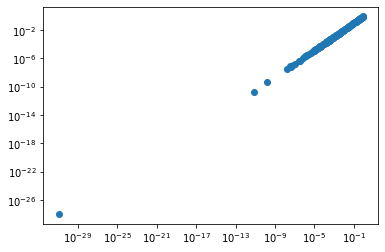

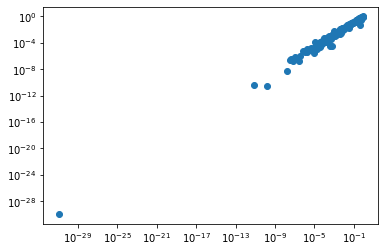

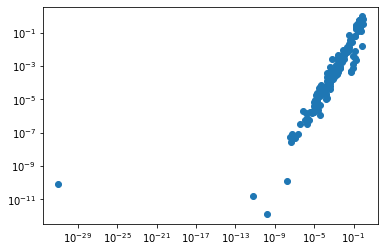

In [61]:
###These should be really close!
fig, ax = plt.subplots()
ax.loglog(results_df['ttest_p'], results_df['logistic_p'], 'o')

# ###These should also be really close!
fig, ax = plt.subplots()
ax.loglog(results_df['ttest_p'], results_df['ranksums_p'], 'o')

# ###Who knows what these look like?
fig, ax = plt.subplots()
ax.loglog(results_df['ttest_p'], results_df['logistic_full_p'], 'o')

**So in total...**

In [62]:
n = results_df.shape[0]
print(results_df[results_df['ttest_p'] < 0.01].shape[0], n)
print(results_df[results_df['ranksums_p'] < 0.01].shape[0], n)
print(results_df[results_df['logistic_p'] < 0.01].shape[0], n)
print(results_df[results_df['logistic_full_p'] < 0.01].shape[0], n)

110 162
104 162
109 162
127 162


In [63]:
print(results_df[(results_df['logistic_coef'] < 0.)].shape[0], n)
print(results_df[(results_df['logistic_coef'] > 0.)].shape[0], n)
print()
#
print(results_df[(results_df['logistic_full_coef'] < 0.)].shape[0], n)
print(results_df[(results_df['logistic_full_coef'] > 0.)].shape[0], n)
print()
#
print(results_df[(results_df['logistic_p'] < 0.01) & (results_df['logistic_coef'] < 0.)].shape[0], n)
print(results_df[(results_df['logistic_p'] < 0.01) & (results_df['logistic_coef'] > 0.)].shape[0], n)
print()
#
print(results_df[(results_df['logistic_full_p'] < 0.01) & (results_df['logistic_full_coef'] < 0.)].shape[0], n)
print(results_df[(results_df['logistic_full_p'] < 0.01) & (results_df['logistic_full_coef'] > 0.)].shape[0], n)

157 162
5 162

158 162
4 162

109 162
0 162

127 162
0 162


In [54]:
# taxid = '562'
# metric = 'RBS_energy'

# ranksums_rbs = []
# ranksums_GC_cds = []
# ranksums_GC_upstream = []
# ranksums_icub = []




# host_df = pd.read_csv('../Data/host_genomes/{}.clean.tsv'.format(taxid), sep='\t', index_col=0)
# assert len(list(host_df['genome_id'].value_counts().keys())) == 1
# host_name = host_df['genome_id'].value_counts().keys()[0]

# for virus_tsv in glob.glob('../Data/{}_rep_viruses/*.clean.tsv'.format(taxid))[:]:
#     if virus_tsv not in independent_set:
#         continue
#     virus_df = pd.read_csv(virus_tsv, sep='\t', index_col=0)
# #     if virus_df.shape[0] < 50 or virus_df.shape[0] > 200:
# #         continue
    
#     ranksums_res = stats.ranksums(host_df['iCUB'], virus_df['iCUB'])
#     ranksums_icub.append(ranksums_res[1])
        
#     ranksums_res = stats.ranksums(host_df['GC_cds'], virus_df['GC_cds'])
#     ranksums_GC_cds.append(ranksums_res[1])
        
#     ranksums_res = stats.ranksums(host_df['GC_upstream'], virus_df['GC_upstream'])
#     ranksums_GC_upstream.append(ranksums_res[1])
        
#     ranksums_res = stats.ranksums(host_df['RBS_energy'], virus_df['RBS_energy'])
#     ranksums_rbs.append(ranksums_res[1])

In [72]:
# print(len([i for i in ranksums_icub if i < 0.01]))
# print(len([i for i in ranksums_GC_cds if i < 0.01]))
# print(len([i for i in ranksums_GC_upstream if i < 0.01]))
# print(len([i for i in ranksums_rbs if i < 0.01]))

33
55
44
38
